# Student: Arora, Sanjana (V00966221)
Question 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,Activation
from keras.regularizers import l2
from keras.utils import np_utils
np.random.seed(1337)
#np.seterr(invalid='raise')

# 1.1 Calculating gradient of softmax function

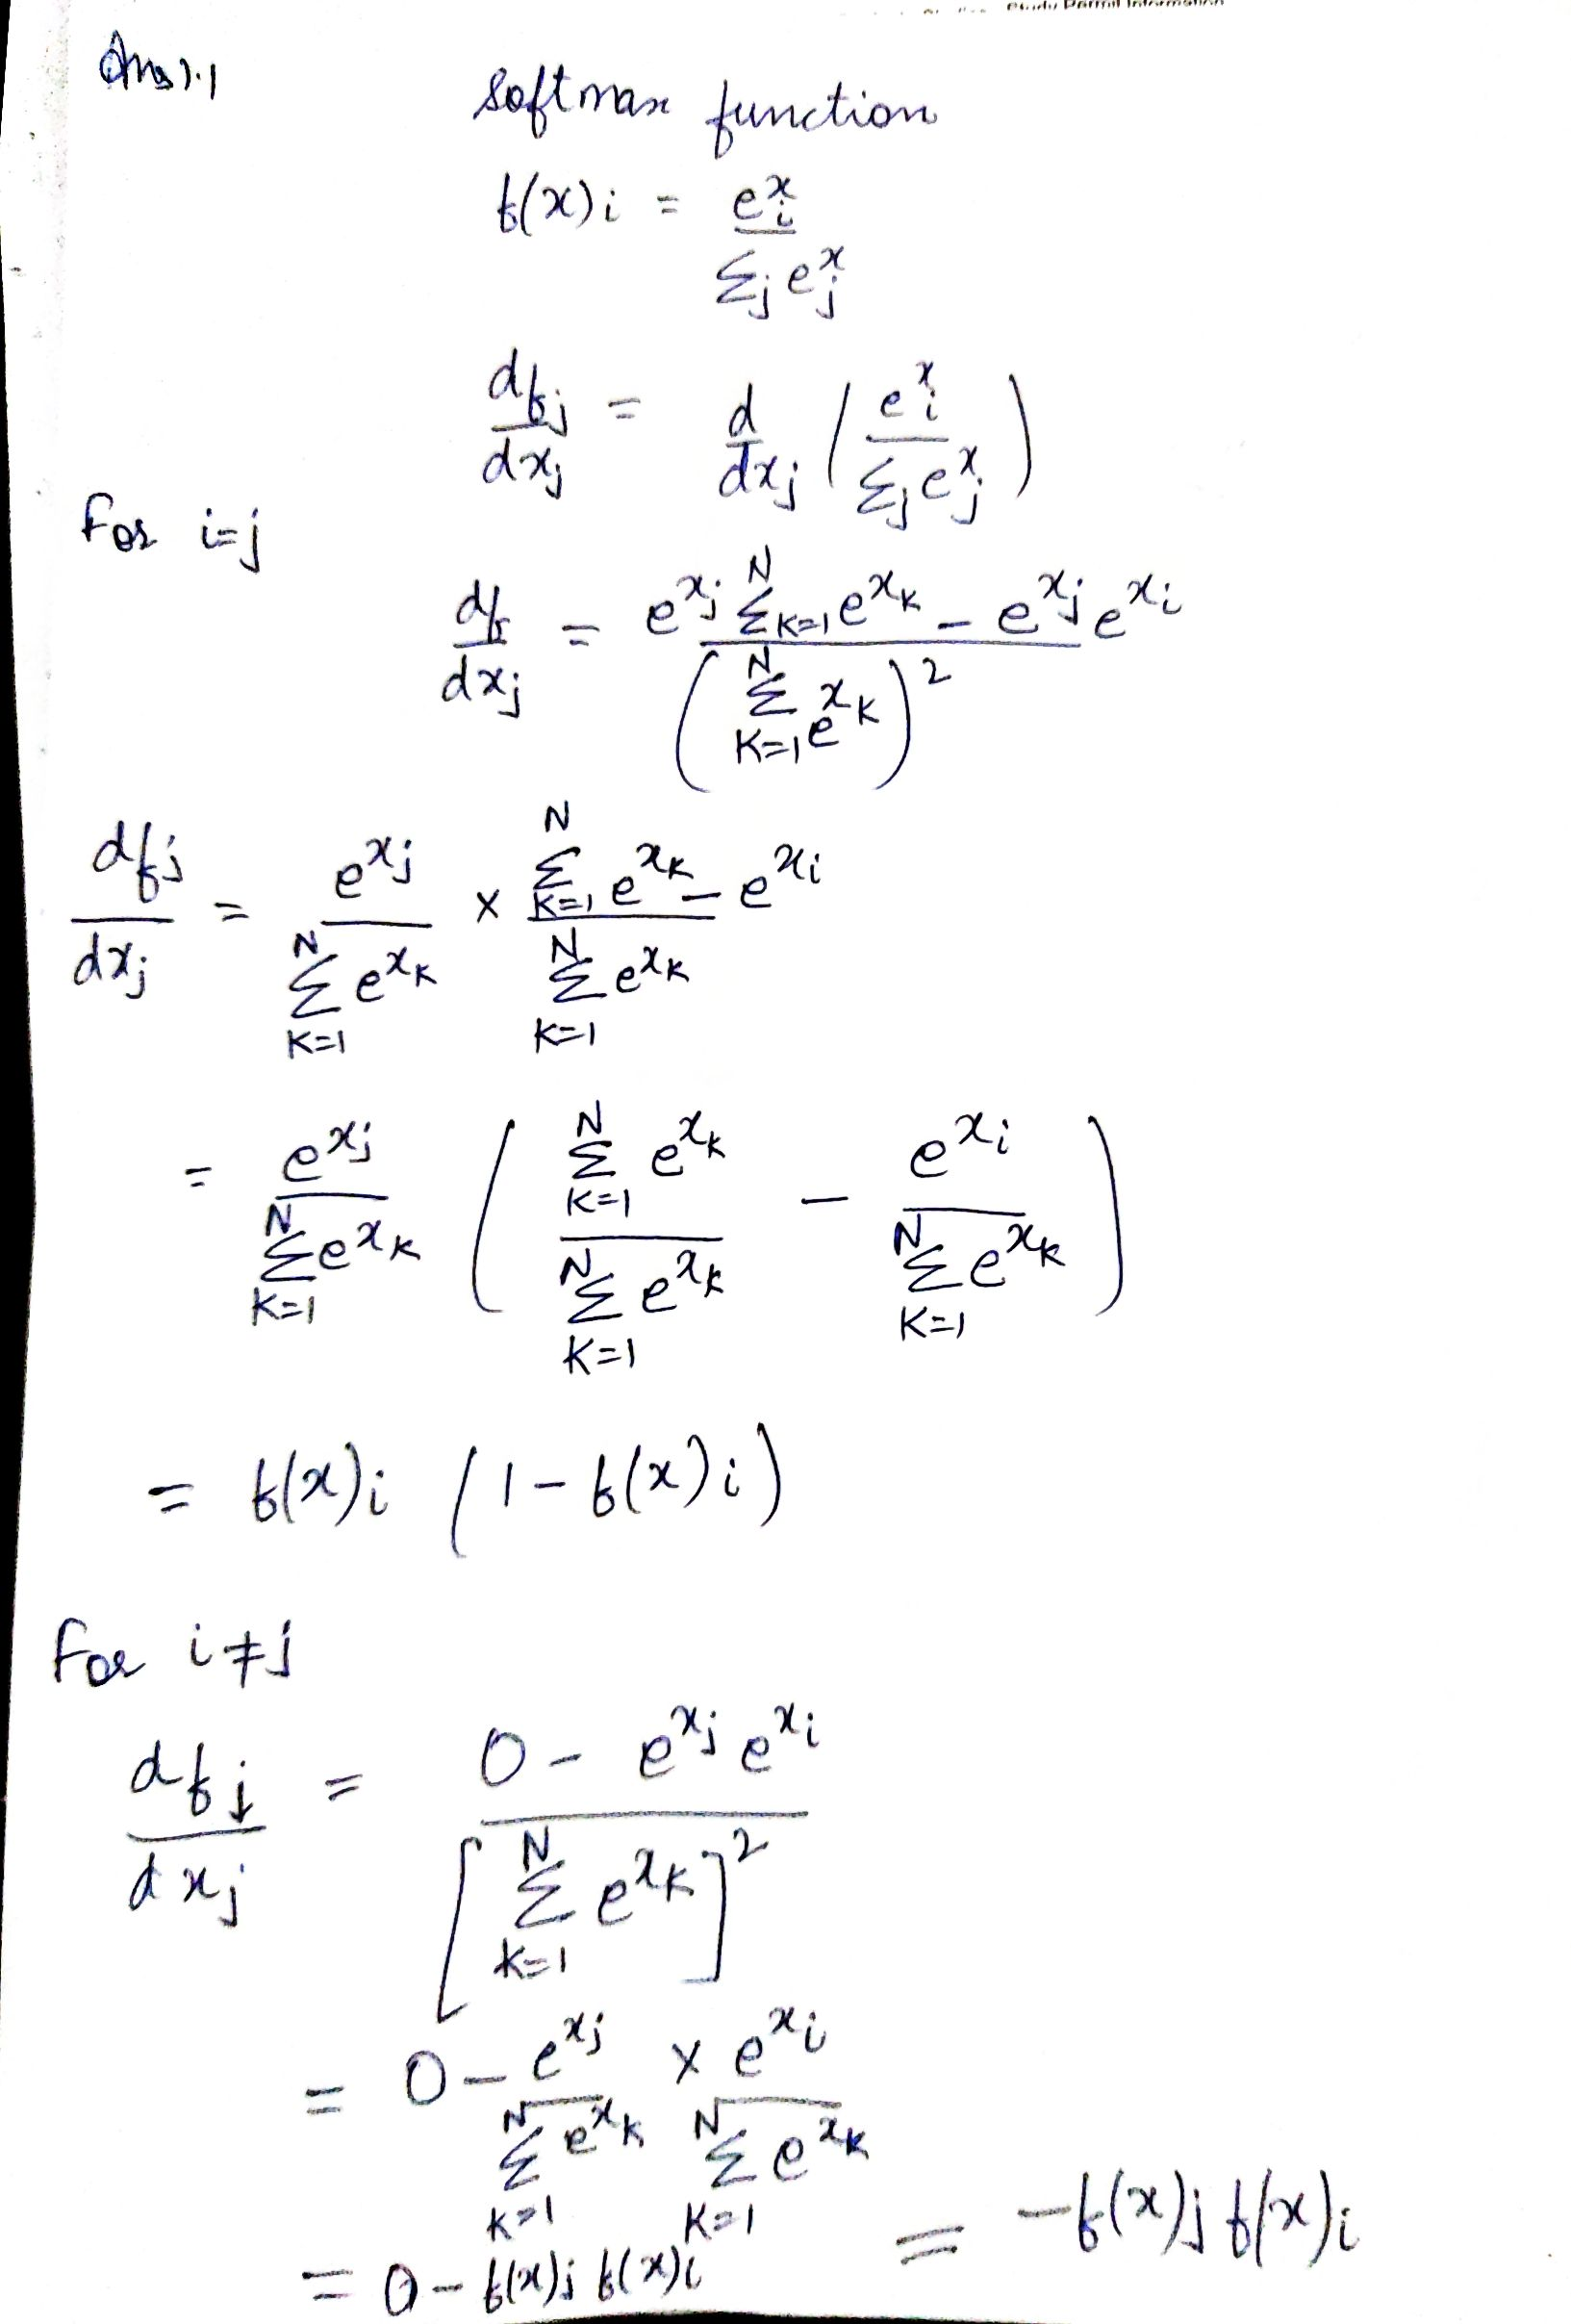

Loading the MNIST data

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# 1.2 Neural Network from Scratch

In [ ]:
input_layer_size = 28*28
hidden_layer_size = 128
output_layer = 10

# function for initializing the weights
def initial_weights(x,y):
    layer=np.random.uniform(-1.,1.,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

# weights for input layer
layer1_weights=initial_weights(input_layer_size,hidden_layer_size)
# weights for hidden layer
layer2_weights=initial_weights(hidden_layer_size,output_layer)

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

In [ ]:
#derivative of sigmoid
def d_sigmoid(x):
    return (np.exp(-x))/((1 + np.exp(-x))**2)

In [ ]:
#Softmax
def softmax(x):
      exp_element=np.exp(x-x.max())
      return exp_element/np.sum(exp_element,axis=0)

# #derivative of softmax
def d_softmax(x):
      exp_element=np.exp(x-x.max())
      return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [ ]:
#forward and backward pass
def forward_backward_pass(x,y):
   # one hot encoding categorical target feature
    z = len(y)
    target_feature = np.zeros((z,10))
    target_feature[range(target_feature.shape[0]),y] = 1

   # forward pass section
    # multiply x with weights of layer 1
    x_l1 = np.dot(x,layer1_weights)
    # normalizing the output after multiplying with the weights
    x_sigmoid = sigmoid(x_l1)
    x_l2= np.dot(x_sigmoid,layer2_weights)
    out = softmax(x_l2)
   
  # backward pass section
    # calculating error in output
    error=2*(out-target_feature) 
    # applying derivative of sigmoid to error
    error = error/out.shape[0]*d_softmax(x_l2) 
    x_sigmoid = np.transpose(x_sigmoid)
    # updating the weights for layer 2 by performing matrix multiplication
    update_l2_weights = x_sigmoid@error
    
    
    error = np.transpose(np.dot(layer2_weights,error.T))
    error= error*d_sigmoid(x_l1)
    # updating the weights for layer 1 by performing matrix multiplication
    update_l1_weights = x.T @ error 

    return out,update_l1_weights,update_l2_weights


In [ ]:
epochs=10000
lr=0.001
batch=128

losses,accuracy_list,test_accuracy, misclassified_index_list=[],[],[],[]

for i in range(epochs):
  # sending the training data in sets of 128 chosen randomly.
    sample=np.random.choice(train_X.shape[0],size=(batch))
    x=train_X[sample].reshape((-1,28*28))
    y=train_Y[sample]
 

    out,update_l1_weights,update_l2_weights=forward_backward_pass(x,y)
  
    result=np.argmax(out,axis=1)
    accuracy=np.mean(result==y)
    accuracy_list.append(accuracy)
    
    # calculating the losses
    loss=np.mean((result-y)**2)
    losses.append(loss)
    
    #performing stochastic gradient descent
    layer1_weights =layer1_weights-lr*update_l1_weights
    layer2_weights =layer2_weights-lr*update_l2_weights
    
    if(i%20==0):    
        test_X=test_X.reshape((-1,28*28))
        # predicting the class Y for test dataset
        predict = np.argmax(softmax(np.dot(sigmoid(np.dot(test_X,layer1_weights)),layer2_weights)),axis=1)
        # calculating test accuracy
        predict = np.mean(predict==test_Y)
        test_accuracy.append(predict)
    if(i%500==0): print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | testing accuracy:{predict:.3f}')

For 0th epoch: train accuracy: 0.125 | testing accuracy:0.087
For 500th epoch: train accuracy: 0.469 | testing accuracy:0.562
For 1000th epoch: train accuracy: 0.672 | testing accuracy:0.704
For 1500th epoch: train accuracy: 0.711 | testing accuracy:0.752
For 2000th epoch: train accuracy: 0.789 | testing accuracy:0.775
For 2500th epoch: train accuracy: 0.836 | testing accuracy:0.790
For 3000th epoch: train accuracy: 0.844 | testing accuracy:0.802
For 3500th epoch: train accuracy: 0.820 | testing accuracy:0.812
For 4000th epoch: train accuracy: 0.828 | testing accuracy:0.819
For 4500th epoch: train accuracy: 0.805 | testing accuracy:0.826
For 5000th epoch: train accuracy: 0.781 | testing accuracy:0.830
For 5500th epoch: train accuracy: 0.867 | testing accuracy:0.834
For 6000th epoch: train accuracy: 0.836 | testing accuracy:0.837
For 6500th epoch: train accuracy: 0.867 | testing accuracy:0.840
For 7000th epoch: train accuracy: 0.828 | testing accuracy:0.842
For 7500th epoch: train accur

Plotting the network's accuracy on test data

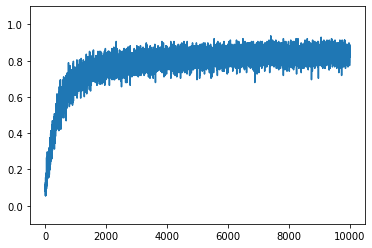

In [ ]:
plt.ylim(-0.1, 1.1)
plt.plot(accuracy_list)

Experimented with the learning rates **[0.001, 0.01, 0.1].** The training and test accuracy was best with the learning rate of **0.001. **

Source referred :https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

## 1.3 Keras

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

units_single_layer = 128
nb_classes = 10

# data preprocessing
train_X = train_X.reshape((-1,28*28))
test_X = test_X.reshape((-1,28*28))
train_X = train_X / 255
test_X = test_X /255

# one hot encoding the classifications
train_y = np_utils.to_categorical(train_Y, nb_classes)
test_y = np_utils.to_categorical(test_Y, nb_classes)

In [ ]:
model = Sequential()
model.add(Dense(units_single_layer, input_shape=(28*28,)))
model.add(Activation('sigmoid'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model.fit(train_X, train_y,
          batch_size=batch,
           epochs = 10,
          validation_data=(test_X, test_y))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.2532 - accuracy: 0.3011 - val_loss: 1.8019 - val_accuracy: 0.7191
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 1.6967 - accuracy: 0.7155 - val_loss: 1.3662 - val_accuracy: 0.7749
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 1.3023 - accuracy: 0.7749 - val_loss: 1.0643 - val_accuracy: 0.8139
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 1.0323 - accuracy: 0.8107 - val_loss: 0.8740 - val_accuracy: 0.8281
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8618 - accuracy: 0.8276 - val_loss: 0.7512 - val_accuracy: 0.8458
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.7450 - accuracy: 0.8437 - val_loss: 0.6679 - val_accuracy: 0.8565
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.6734 - accuracy: 0.8510 - val_loss: 0.6080 - val_accuracy: 0.8648
Epoch 

In [ ]:
#Calculating Model Training Accuracy
train_loss, train_accuracy = model.evaluate(train_X, train_y)
print("Model Training Accuracy is:", train_accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5195 - accuracy: 0.8711
Model Training Accuracy is: 0.871066689491272


In [ ]:
#Calculating Model Training Accuracy
test_loss, test_accuracy = model.evaluate(test_X, test_y)
print("Model Training Accuracy is:", test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.8795
Model Training Accuracy is: 0.8794999718666077


In [ ]:
# collecting indices of misclassified classified images
predict = np.argmax(model.predict(test_X), axis=-1)
result = np.absolute(test_Y-predict)
index_NN=np.where(result!= 0)[0]


**Observation**: The training and testing accuracy of Neural Newtork created with Keras ( approx. 87%) is higher than the Neural Network created from scratch ( approx. 85%).

Further, the execution time of the Neural Network created from scratch is approx. 2 minutes while the Neural Network created with Keras takes total of approx. 21secs. Suggesting that Neural Network created using Keras is faster than Neural Network created from scratch.

# 1.4 ReLU

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

# data preprocessing
train_X = train_X.reshape((-1,28*28))
test_X = test_X.reshape((-1,28*28))
train_X = train_X / 255
test_X = test_X /255
# Convert class vectors to binary class matrices.
train_y = np_utils.to_categorical(train_Y, nb_classes)
test_y = np_utils.to_categorical(test_Y, nb_classes)


In [ ]:
model_relu = Sequential()
model_relu.add(Dense(units_single_layer, input_shape=(28*28,)))
model_relu.add(Activation('relu'))
model_relu.add(Dense(nb_classes))
model_relu.add(Activation('softmax'))
model_relu.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model_relu.fit(train_X, train_y,
          batch_size=batch,
           epochs = 10,
          validation_data=(test_X, test_y))

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.6094 - accuracy: 0.5572 - val_loss: 0.6357 - val_accuracy: 0.8563
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.5924 - accuracy: 0.8590 - val_loss: 0.4532 - val_accuracy: 0.8862
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4540 - accuracy: 0.8816 - val_loss: 0.3899 - val_accuracy: 0.8972
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3921 - accuracy: 0.8947 - val_loss: 0.3558 - val_accuracy: 0.9045
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3632 - accuracy: 0.8991 - val_loss: 0.3335 - val_accuracy: 0.9090
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3422 - accuracy: 0.9033 - val_loss: 0.3169 - val_accuracy: 0.9129
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3261 - accuracy: 0.9091 - val_loss: 0.3045 - val_accuracy: 0.9138
Epoch 

In [ ]:
#Calculating Model Training Accuracy
train_loss_relu, train_accuracy_relu = model_relu.evaluate(train_X, train_y)
print("Model Training Accuracy is:", train_accuracy_relu)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.9213
Model Training Accuracy is: 0.9213333129882812


In [ ]:
#Calculating Model Testing Accuracy
test_loss_relu, test_accuracy_relu = model_relu.evaluate(test_X, test_y)
print("Model Testing Accuracy is:", test_accuracy_relu)

313/313 [==============================] - 0s 1ms/step - loss: 0.2704 - accuracy: 0.9260
Model Testing Accuracy is: 0.9259999990463257


In [ ]:
# collecting indices of misclassified classified images
predict_relu = np.argmax(model_relu.predict(test_X), axis=-1)
result = np.absolute(test_Y-predict_relu)
index_relu = np.where(result!= 0)[0]

The Relu activation function has improved the performance of the Neural Network. As the training and testing accuracy scores have improve significantly to approx. 92% from 87% that was achieved using sigmoid activation function.

## 1.5 Three-Hidden layered network with dropout

Cross Validation to select the hyper parameters. Since, Relu performed well on the Neural Network classifier, continuing the use of Relu activation function for rest of the models as well.

In [ ]:
# function for implementing the model

def model_dropout(reg, drop):
  model_dropout = Sequential()
  model_dropout.add(Dense(units_single_layer, input_shape=(28*28,),kernel_regularizer=l2(reg)))
  model_dropout.add(Dropout(drop))
  model_dropout.add(Activation('relu'))
  model_dropout.add(Dense(64 ,kernel_regularizer=l2(reg)))
  model_dropout.add(Dropout(drop))
  model_dropout.add(Activation('relu'))
  model_dropout.add(Dense(32,kernel_regularizer=l2(reg)))
  model_dropout.add(Dropout(drop))
  model_dropout.add(Activation('relu'))
  model_dropout.add(Dense(nb_classes,kernel_regularizer=l2(reg)))
  model_dropout.add(Activation('softmax'))
  model_dropout.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
  model_dropout.fit(train_X, train_y,
          batch_size=batch,
           epochs = 10,
          validation_data=(test_X, test_y))
  #Calculating Model Training Accuracy
  train_loss, train_accuracy = model_dropout.evaluate(train_X, train_y)

  #Calculating Model Testing Accuracy
  test_loss, test_accuracy = model_dropout.evaluate(test_X, test_y)
  print(f'For drop parameter {drop} and regularization parameter {reg}: train accuracy: {train_accuracy:.3f} | testing accuracy:{test_accuracy:.3f}')
  return train_accuracy, test_accuracy

In [ ]:
# performing cross validation
drop_list = [0.25,0.5, 0.7]
reg_list = [0.1, 0.001, 0.0001]

# empty lists for storing the training and testing accuracy values for each model
train_accuracy_list = []
test_accuracy_list = []
drop_l = []
reg_l = []

for drop in drop_list:
  for reg in reg_list:
    train_accuracy, test_accuracy = model_dropout(reg, drop)
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)
    drop_l.append(drop)
    reg_l.append(reg)
train_accuracy = train_accuracy_list
test_accuracy = test_accuracy_list
drop_parameters = drop_l
reg_parameters = reg_l


Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 26.6789 - accuracy: 0.1876 - val_loss: 7.8632 - val_accuracy: 0.3200
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 6.0656 - accuracy: 0.2140 - val_loss: 3.1663 - val_accuracy: 0.1135
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.8853 - accuracy: 0.1126 - val_loss: 2.4342 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.3909 - accuracy: 0.1126 - val_loss: 2.3215 - val_accuracy: 0.1135
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 2.3150 - accuracy: 0.1136 - val_loss: 2.3042 - val_accuracy: 0.1135
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 2.3032 - accuracy: 0.1111 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 2.3016 - accuracy: 0.1131 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch

In [ ]:
# dataframe storing the train and test accuracy achieved at different drop and L2 regularization parameters
df_accuracy = pd.DataFrame(zip(train_accuracy,test_accuracy,drop_parameters,reg_parameters), columns = ["Train_Accuracy", "Test_Accuracy", "Drop_Parameter", "Regularization_Parameter"])
df_accuracy

,Train_Accuracy,Test_Accuracy,Drop_Parameter,Regularization_Parameter
0,0.112367,0.1135,0.25,0.1000
1,0.927967,0.9258,0.25,0.0010
2,0.931817,0.9343,0.25,0.0001
3,0.112367,0.1135,0.50,0.1000
4,0.893683,0.8962,0.50,0.0010
5,0.882150,0.8837,0.50,0.0001
6,0.112367,0.1135,0.70,0.1000
7,0.626800,0.6268,0.70,0.0010
8,0.563617,0.5740,0.70,0.0001


As indicated in the dataframe above,drop out parameter 0.25 and the L2 regulatization parameter with 0.0001 provides the best training and test accuracy. 
Further, the improvements by using these parameters is significantly larger for other drop out parameter 0.70 and the L2 regulatization parameter with [0.0001, 0.1000, 0.0010].

# Implementing the model with the selected parameters and also identifying the indices of images misclassified by the model

In [ ]:
model_dropout = Sequential()
model_dropout.add(Dense(units_single_layer, input_shape=(28*28,),kernel_regularizer=l2(0.0001)))
model_dropout.add(Dropout(0.25))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(64 ,kernel_regularizer=l2(0.0001)))
model_dropout.add(Dropout(0.25))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(32,kernel_regularizer=l2(0.0001)))
model_dropout.add(Dropout(0.25))
model_dropout.add(Activation('relu'))
model_dropout.add(Dense(nb_classes,kernel_regularizer=l2(0.0001)))
model_dropout.add(Activation('softmax'))
model_dropout.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
model_dropout.fit(train_X, train_y, batch_size=batch,epochs = 10, validation_data=(test_X, test_y))
  
#Calculating Model Training Accuracy
train_loss, train_accuracy = model_dropout.evaluate(train_X, train_y)

#Calculating Model Testing Accuracy
test_loss, test_accuracy = model_dropout.evaluate(test_X, test_y)
print(f' train accuracy: {train_accuracy:.3f} | testing accuracy:{test_accuracy:.3f}')

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.1298 - accuracy: 0.2590 - val_loss: 1.1132 - val_accuracy: 0.7405
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 1.2902 - accuracy: 0.5868 - val_loss: 0.6472 - val_accuracy: 0.8476
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.9423 - accuracy: 0.7074 - val_loss: 0.4924 - val_accuracy: 0.8808
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.7736 - accuracy: 0.7713 - val_loss: 0.4225 - val_accuracy: 0.8977
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6755 - accuracy: 0.8039 - val_loss: 0.3777 - val_accuracy: 0.9083
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6074 - accuracy: 0.8298 - val_loss: 0.3446 - val_accuracy: 0.9164
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5657 - accuracy: 0.8437 - val_loss: 0.3252 - val_accuracy: 0.9200
Epoch 

In [ ]:
#Images misclassified in Q1.5
predict_dropout = np.argmax(model_dropout.predict(test_X), axis=-1)
result = np.absolute(test_Y-predict_dropout)

#Storing the index of the non-zero elements in a new array
index_dropout=np.where(result!= 0)[0]

# 1.6 Convolution Neural Network

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

nb_classes = 10
# data preprocessing
train_X = train_X.reshape((60000,28, 28, 1))
test_X = test_X.reshape((10000,28, 28, 1))
train_X = train_X / 255
test_X = test_X /255

# one hot encoding the classifications
train_y = np_utils.to_categorical(train_Y, nb_classes)
test_y = np_utils.to_categorical(test_Y, nb_classes)

In [ ]:
model_CNN = Sequential()
model_CNN.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1)))
model_CNN.add(MaxPool2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(10, activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model_CNN.fit(train_X, train_y,batch_size=128,epochs = 10,validation_data=(test_X, test_y))

Epoch 1/10
469/469 [==============================] - 29s 58ms/step - loss: 1.5683 - accuracy: 0.5928 - val_loss: 0.3782 - val_accuracy: 0.8953
Epoch 2/10
469/469 [==============================] - 27s 57ms/step - loss: 0.3587 - accuracy: 0.8986 - val_loss: 0.2904 - val_accuracy: 0.9165
Epoch 3/10
469/469 [==============================] - 27s 57ms/step - loss: 0.2899 - accuracy: 0.9159 - val_loss: 0.2525 - val_accuracy: 0.9290
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.2538 - accuracy: 0.9273 - val_loss: 0.2304 - val_accuracy: 0.9346
Epoch 5/10
469/469 [==============================] - 27s 57ms/step - loss: 0.2319 - accuracy: 0.9346 - val_loss: 0.2109 - val_accuracy: 0.9414
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 0.2077 - accuracy: 0.9397 - val_loss: 0.1919 - val_accuracy: 0.9441
Epoch 7/10
469/469 [==============================] - 27s 57ms/step - loss: 0.1923 - accuracy: 0.9426 - val_loss: 0.1768 - val_accuracy:

In [ ]:
#Calculating Model Training Accuracy
train_loss_CNN, train_accuracy_CNN = model_CNN.evaluate(train_X, train_y)

#Calculating Model Testing Accuracy
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(test_X, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.1450 - accuracy: 0.9580


In [ ]:
#Images misclassified in Q1.2-Q1.3
predict_CNN = np.argmax(model_CNN.predict(test_X), axis=-1)
result = np.absolute(test_Y-predict_CNN)

#Storing the index of the non-zero elements in a new array
index_CNN=np.where(result!= 0)[0]

**Justification on the hyperparameters used** - Since ReLu activation function was providing higher accuracy as compared to the sigmoid activation function, I preferred using ReLu activation function in the Convolution Neural Network as well.

Convolution helps in identifying key features such as edges, lines, shapes, etc.Therefore, the kernel of suitable size is used to identify the key features in the image. Odd sized Kernels are preferred as they are symmetric around origin and thus, lead to a symmetrical shift of the image. A large kernel size can overlook the key features while a small kernel size could provide more information leading to confusion. Therefore, 3*3 size of kernel is being used.

**Observation** : The accuracy values have improved significantly with the use of convolutional neural network approx. 95% suggesting good estimation of key features.

# 1.7 Mugshots

In [ ]:
# intersection of the indices of images classified by all the models
array1 = np.intersect1d(index_CNN, index_relu)
array2 = np.intersect1d(array1, index_dropout)
array3 = np.intersect1d(array2, index_NN)
print(array3) # final intersection array of misclassified images of all the models

[ 124  241  247  259  300  313  320  321  362  381  445  448  449  495
  507  531  551  565  578  582  591  610  613  619  628  659  684  689
  691  707  717  740  760  795  810  844  881  938  939  950  956  959
  965  982 1014 1039 1044 1062 1107 1112 1114 1181 1182 1192 1194 1198
 1204 1226 1232 1242 1247 1248 1260 1283 1319 1326 1328 1337 1357 1364
 1413 1463 1494 1500 1522 1527 1530 1549 1553 1569 1587 1609 1634 1681
 1709 1717 1732 1751 1754 1790 1828 1850 1868 1878 1901 1938 1941 1952
 1981 1984 2016 2024 2033 2043 2044 2053 2070 2098 2105 2109 2118 2129
 2130 2135 2174 2182 2185 2186 2189 2215 2266 2272 2293 2299 2305 2325
 2371 2387 2406 2408 2414 2422 2433 2454 2488 2607 2610 2648 2654 2771
 2853 2863 2877 2896 2927 2939 2945 2953 2995 3005 3060 3073 3110 3130
 3167 3189 3206 3269 3284 3330 3333 3405 3410 3422 3490 3503 3520 3549
 3567 3573 3597 3718 3726 3751 3757 3767 3780 3796 3808 3811 3818 3838
 3846 3853 3869 3876 3906 3926 3941 3943 3946 3951 3976 3985 3986 4000
 4017 

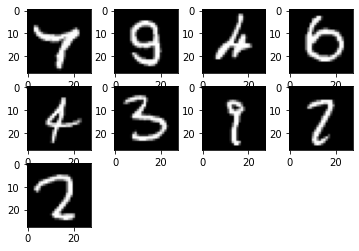

In [ ]:
# plotting the 9 images
for i in range(9):
  plt.subplot(3,4,i+1)
  plt.imshow(test_X[array3[i]].reshape(28,28),cmap='gray')

Few of the images, even I couldn't have recognized because they are very unclear. While some of the misclassified images could have been recognized for example 9 and 4 of the top row of the images  or 2 of the last row.

## Bonus Question

# Leaky Relu

In [ ]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [ ]:
# weights for input layer
layer1_weights=initial_weights2(input_layer_size,hidden_layer_size)
# weights for hidden layer
layer2_weights=initial_weights2(hidden_layer_size,output_layer)

In [ ]:
def relu(x):
  x[np.isnan(x)] = 0
  relu = np.maximum(x,0.01)
  return relu

In [ ]:
#derivative of leaky_relu
def d_relu(x):
  x[np.isnan(x)] = 0
  x[x<=0] = 0.01
  x[x>0] = 1
  return x

In [ ]:
#forward and backward pass
def forward_backward_pass_relu(x,y):
   # one hot encoding categorical target feature
    z = len(y)
    target_feature = np.zeros((z,10))
    target_feature[range(target_feature.shape[0]),y] = 1

   # forward pass section
    # multiply x with weights of layer 1
    x_l1 = np.dot(x,layer1_weights)
    # normalizing the output after multiplying with the weights
    x_leaky_relu = relu(x_l1)
    x_l2= np.dot(x_leaky_relu,layer2_weights)
    out = softmax(x_l2)
  
  # backward pass section
    # calculating error in output
    error=2*(out-target_feature) 
    # applying derivative of relu to error
    error = error/out.shape[0]*d_relu(x_l2)
    
    x_leaky_relu = np.transpose(x_leaky_relu)
    
    # updating the weights for layer 2 by performing matrix multiplication
    update_l2_weights = x_leaky_relu@error
    
    
    error = np.transpose(np.dot(layer2_weights,error.T))
    error= error*d_relu(x_l1)
    
    # updating the weights for layer 1 by performing matrix multiplication
    update_l1_weights =  x.T @error

    return out,update_l1_weights,update_l2_weights

In [ ]:
epochs=10000
lr=0.1
batch=128


losses,accuracy_list,test_accuracy=[],[],[]

for i in range(epochs):
  # performing stochastic gradient descent by sending the training data in sets of 128 chosen randomly.
    sample=np.random.choice(train_X.shape[0],size=(batch))
    x=train_X[sample].reshape((-1,28*28))
    y=train_Y[sample]
 

    out,update_l1_weights,update_l2_weights=forward_backward_pass_relu(x,y)
  
    result=np.argmax(out,axis=1)
    accuracy=np.mean(result==y)
    accuracy_list.append(accuracy)
    
    loss=np.mean((result-y)**2)
    losses.append(loss)
    
    layer1_weights =layer1_weights-lr*update_l1_weights
    layer2_weights =layer2_weights-lr*update_l2_weights
    
    if(i%20==0): 
      test_X=test_X.reshape((-1,28*28))
      predict = np.argmax(softmax(np.dot(relu(np.dot(test_X,layer1_weights)),layer2_weights)),axis=1)
      predict = np.mean(predict==test_Y)
      test_accuracy.append(predict)
    if(i%500==0):print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | testing accuracy:{predict:.3f}')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


For 0th epoch: train accuracy: 0.070 | testing accuracy:0.098
For 500th epoch: train accuracy: 0.109 | testing accuracy:0.098
For 1000th epoch: train accuracy: 0.094 | testing accuracy:0.098
For 1500th epoch: train accuracy: 0.086 | testing accuracy:0.098
For 2000th epoch: train accuracy: 0.078 | testing accuracy:0.098
For 2500th epoch: train accuracy: 0.125 | testing accuracy:0.098
For 3000th epoch: train accuracy: 0.070 | testing accuracy:0.098
For 3500th epoch: train accuracy: 0.086 | testing accuracy:0.098
For 4000th epoch: train accuracy: 0.102 | testing accuracy:0.098
For 4500th epoch: train accuracy: 0.102 | testing accuracy:0.098
For 5000th epoch: train accuracy: 0.102 | testing accuracy:0.098
For 5500th epoch: train accuracy: 0.109 | testing accuracy:0.098
For 6000th epoch: train accuracy: 0.109 | testing accuracy:0.098
For 6500th epoch: train accuracy: 0.086 | testing accuracy:0.098
For 7000th epoch: train accuracy: 0.125 | testing accuracy:0.098
For 7500th epoch: train accur